<a href="https://colab.research.google.com/github/paviomuniz/alura/blob/main/munpa02_Alura_Aula02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

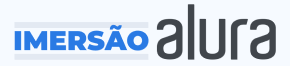

#Imersão em Dados - Análise exploratória

In [1]:
# Importações
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Buiscar base de dados de experimentos
url_dados = "https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true"
# Ler base de dados
dados = pd.read_csv(url_dados, compression='zip')

In [2]:
#Base da dados
dados

id    tratamento  tempo dose  ...    c-96    c-97    c-98    c-99
0      id_000644bb2     com_droga     24   D1  ... -0.3981  0.2139  0.3801  0.4176
1      id_000779bfc     com_droga     72   D1  ...  0.1522  0.1241  0.6077  0.7371
2      id_000a6266a     com_droga     48   D1  ... -0.6417 -0.2187 -1.4080  0.6931
3      id_0015fd391     com_droga     48   D1  ... -1.6210 -0.8784 -0.3876 -0.8154
4      id_001626bd3     com_droga     72   D2  ...  0.1094  0.2885 -0.3786  0.7125
...             ...           ...    ...  ...  ...     ...     ...     ...     ...
23809  id_fffb1ceed     com_droga     24   D2  ...  0.0631  0.9171  0.5258  0.4680
23810  id_fffb70c0c     com_droga     24   D2  ... -0.2084 -0.1224 -0.2715  0.3689
23811  id_fffc1c3f4  com_controle     48   D2  ...  0.2256  0.7592  0.6656  0.3808
23812  id_fffcb9e7c     com_droga     24   D1  ...  0.1732  0.7015 -0.6290  0.0740
23813  id_ffffdd77b     com_droga     72   D1  ... -3.5770 -0.4775 -2.1500 -4.2520

[23814 rows x 877 columns]

### Cada linha significa - cada linha cultura de célula submetida a uma droga.
### id = id do tratamento</p>
### tratamento = 'com_droga': 'com a droga', 'com_controle' : 'mesma condição sem a droga'
### Tempo = tempo de exposição do experimento 
### Dose = 1 e 2
### Droga = substância aplicada
### g-0-x = Genes  - velocidade de produção de RNA? já estão normalizados</p>


In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 877 entries, id to c-99
dtypes: float64(872), int64(1), object(4)
memory usage: 159.3+ MB


In [4]:
dados['tratamento'].unique()

array(['com_droga', 'com_controle'], dtype=object)

In [5]:
dados['tempo'].unique()

array([24, 72, 48])

In [6]:
dados['dose'].unique()

array(['D1', 'D2'], dtype=object)

In [7]:
dados['droga'].unique()

array(['b68db1d53', 'df89a8e5a', '18bb41b2c', ..., '573c787a2',
       'b2fe3eca7', 'dd4a96d16'], dtype=object)

In [8]:
dados['g-0'].describe()

count    23814.000000
mean         0.248366
std          1.393399
min         -5.513000
25%         -0.473075
50%         -0.008850
75%          0.525700
max         10.000000
Name: g-0, dtype: float64

In [9]:
dados['tratamento'].value_counts(normalize=True)

com_droga       0.921643
com_controle    0.078357
Name: tratamento, dtype: float64

In [10]:
dados['dose'].value_counts(normalize=True)

D1    0.510078
D2    0.489922
Name: dose, dtype: float64

In [11]:
dados['droga'].value_counts(normalize=True)

cacb2b860    0.078357
87d714366    0.030150
9f80f3f77    0.010330
8b87a7a83    0.008524
5628cb3ee    0.008482
               ...   
b3f24a171    0.000042
23458e56a    0.000042
57f5932fb    0.000042
288e0d205    0.000042
c0521523c    0.000042
Name: droga, Length: 3289, dtype: float64

In [12]:
dados['dose'].value_counts()

D1    12147
D2    11667
Name: dose, dtype: int64

In [13]:
dados.tail()

id    tratamento  tempo dose  ...    c-96    c-97    c-98    c-99
23809  id_fffb1ceed     com_droga     24   D2  ...  0.0631  0.9171  0.5258  0.4680
23810  id_fffb70c0c     com_droga     24   D2  ... -0.2084 -0.1224 -0.2715  0.3689
23811  id_fffc1c3f4  com_controle     48   D2  ...  0.2256  0.7592  0.6656  0.3808
23812  id_fffcb9e7c     com_droga     24   D1  ...  0.1732  0.7015 -0.6290  0.0740
23813  id_ffffdd77b     com_droga     72   D1  ... -3.5770 -0.4775 -2.1500 -4.2520

[5 rows x 877 columns]

Text(0.5, 1.0, 'Tipo de Tratamento')

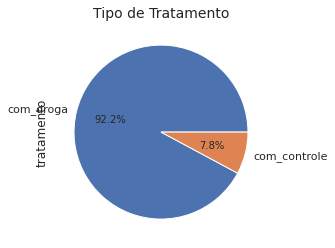

In [14]:

dados['tratamento'].value_counts().plot.pie(autopct="%.1f%%")
plt.title("Tipo de Tratamento", fontsize=14)
#data.plot.pie(autopct="%.1f%%")

Text(0.5, 1.0, 'Tempo')

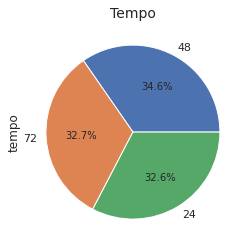

In [15]:
dados['tempo'].value_counts().plot.pie(autopct="%.1f%%")
plt.title("Tempo", fontsize=14)

Text(0.5, 1.0, 'Análises x Tempo')

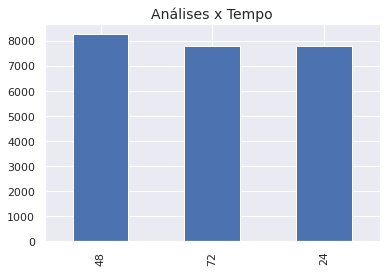

In [16]:
p = dados['tempo'].value_counts().plot.bar(grid=True, style="bmh")
plt.title("Análises x Tempo", fontsize=14)

In [17]:
dados_filtrados = dados[dados['g-0'] > 0]
dados_filtrados.head()

id tratamento  tempo dose  ...    c-96    c-97    c-98    c-99
0  id_000644bb2  com_droga     24   D1  ... -0.3981  0.2139  0.3801  0.4176
1  id_000779bfc  com_droga     72   D1  ...  0.1522  0.1241  0.6077  0.7371
2  id_000a6266a  com_droga     48   D1  ... -0.6417 -0.2187 -1.4080  0.6931
6  id_001bd861f  com_droga     24   D2  ...  2.4670  0.0357  0.1351 -0.3179
7  id_0020d0484  com_droga     48   D1  ...  0.6633  0.4562 -0.9622  0.0260

[5 rows x 877 columns]

In [18]:
# Cria um dicionário com o nome da coluna atual, e com nome sem '-'.
b = dict((i, i.replace("-","")) for c,i in enumerate(dados.columns) )

In [19]:
dados = dados.rename(columns=b)

In [20]:
dados

id    tratamento  tempo dose  ...     c96     c97     c98     c99
0      id_000644bb2     com_droga     24   D1  ... -0.3981  0.2139  0.3801  0.4176
1      id_000779bfc     com_droga     72   D1  ...  0.1522  0.1241  0.6077  0.7371
2      id_000a6266a     com_droga     48   D1  ... -0.6417 -0.2187 -1.4080  0.6931
3      id_0015fd391     com_droga     48   D1  ... -1.6210 -0.8784 -0.3876 -0.8154
4      id_001626bd3     com_droga     72   D2  ...  0.1094  0.2885 -0.3786  0.7125
...             ...           ...    ...  ...  ...     ...     ...     ...     ...
23809  id_fffb1ceed     com_droga     24   D2  ...  0.0631  0.9171  0.5258  0.4680
23810  id_fffb70c0c     com_droga     24   D2  ... -0.2084 -0.1224 -0.2715  0.3689
23811  id_fffc1c3f4  com_controle     48   D2  ...  0.2256  0.7592  0.6656  0.3808
23812  id_fffcb9e7c     com_droga     24   D1  ...  0.1732  0.7015 -0.6290  0.0740
23813  id_ffffdd77b     com_droga     72   D1  ... -3.5770 -0.4775 -2.1500 -4.2520

[23814 rows x 877 columns]

In [21]:
dados.query('g1 >2 and dose=="D2" and tempo==72')['droga'].value_counts()[:5]

87d714366    16
cacb2b860     8
bb3b7c7d5     2
d1b47f29d     2
d08af5d4b     2
Name: droga, dtype: int64

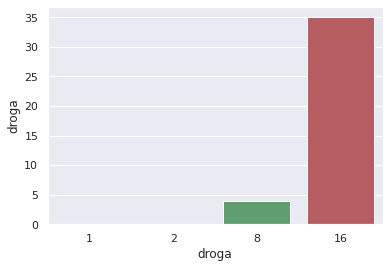

In [22]:
destaque = dados.query('g1 >2 and dose=="D2" and tempo==72')['droga'].value_counts()[:10]
#destaque48 = dados.query('g1 >2 and dose=="D2" and tempo==48')['droga'].value_counts()[:10]
sns.barplot(
    x = dados.query('g1 >2 and dose=="D2" and tempo==72')['droga'].value_counts()[:10],
    y = dados.query('g1 >2 and dose=="D2" and tempo==48')['droga'].value_counts()[:10]
    )
#.plot.bar(title="Drogas com f>2 para g1 em 72h",grid=True,style='mbh')

In [23]:
mapa = {'droga':'composto'}
dados.rename(columns=mapa, inplace=True)

In [24]:
dados

id    tratamento  tempo dose  ...     c96     c97     c98     c99
0      id_000644bb2     com_droga     24   D1  ... -0.3981  0.2139  0.3801  0.4176
1      id_000779bfc     com_droga     72   D1  ...  0.1522  0.1241  0.6077  0.7371
2      id_000a6266a     com_droga     48   D1  ... -0.6417 -0.2187 -1.4080  0.6931
3      id_0015fd391     com_droga     48   D1  ... -1.6210 -0.8784 -0.3876 -0.8154
4      id_001626bd3     com_droga     72   D2  ...  0.1094  0.2885 -0.3786  0.7125
...             ...           ...    ...  ...  ...     ...     ...     ...     ...
23809  id_fffb1ceed     com_droga     24   D2  ...  0.0631  0.9171  0.5258  0.4680
23810  id_fffb70c0c     com_droga     24   D2  ... -0.2084 -0.1224 -0.2715  0.3689
23811  id_fffc1c3f4  com_controle     48   D2  ...  0.2256  0.7592  0.6656  0.3808
23812  id_fffcb9e7c     com_droga     24   D1  ...  0.1732  0.7015 -0.6290  0.0740
23813  id_ffffdd77b     com_droga     72   D1  ... -3.5770 -0.4775 -2.1500 -4.2520

[23814 rows x 877 columns]

In [25]:
cod_compostos = dados['composto'].value_counts()[:5]

In [26]:
cod_compostos.index

Index(['cacb2b860', '87d714366', '9f80f3f77', '8b87a7a83', '5628cb3ee'], dtype='object')

In [27]:
#data_plot=dados.query('composto in @cod_compostos["composto"]')

In [28]:
#data_plot

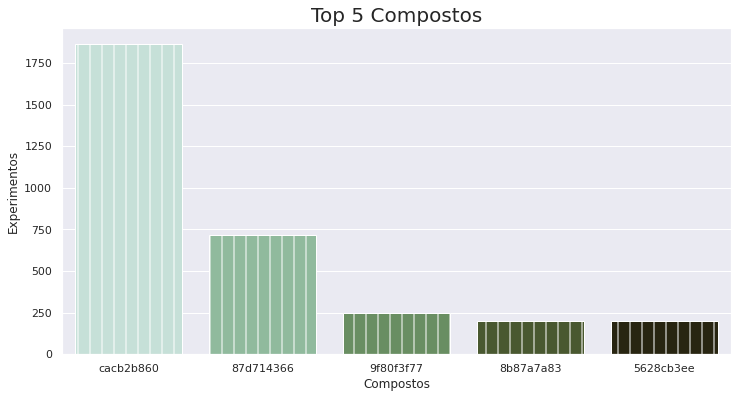

In [29]:

plt.figure(figsize=(12,6))
#
# data_plot = dados.query('composto in @cod_compostos').sort_values(by='composto', ascending=False)
ax = sns.countplot(
    x='composto',
    data=dados.query('composto in @cod_compostos.index'),    
    hatch='|',
    palette='ch:1.25',
    order=cod_compostos.index)

ax.set_title('Top 5 Compostos', fontsize=20)
ax.set_xlabel('Compostos')

ax.set_ylabel('Experimentos')
plt.show()

In [30]:
len(dados['g0'].unique())


14367

In [31]:
dados['g0'].min()

-5.513

In [32]:
dados['g0'].max()

10.0

Text(0, 0.5, 'Experimentos')

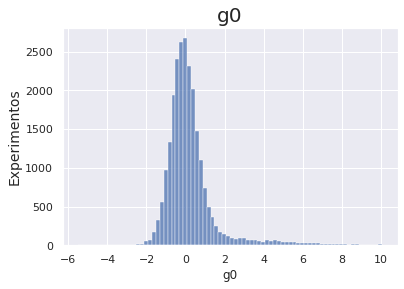

<Figure size 576x576 with 0 Axes>

In [33]:
#dados['g0'].hist(bins=100)
ax = sns.histplot(dados['g0'], binwidth=.20)
plt.figure(figsize=(8,8))
ax.set_title('g0', fontsize=20)
ax.set_ylabel('Experimentos', fontsize=14)


In [34]:
dados[['g1','g2']].describe()

g1            g2
count  23814.000000  23814.000000
mean      -0.095684      0.152253
std        0.812363      1.035731
min       -5.737000     -9.104000
25%       -0.562200     -0.437750
50%       -0.046600      0.075200
75%        0.403075      0.663925
max        5.039000      8.257000

Text(0, 0.5, 'Valores')

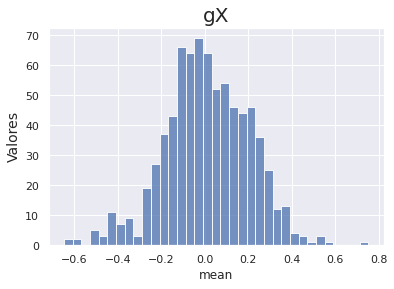

In [35]:
ax = sns.histplot(
    dados.loc[:, 'g0':'g771'].describe().T['mean'],
    binwidth=.04)
ax.set_title('gX', fontsize=20)
ax.set_ylabel('Valores', fontsize=14)

Text(0, 0.5, 'Valores')

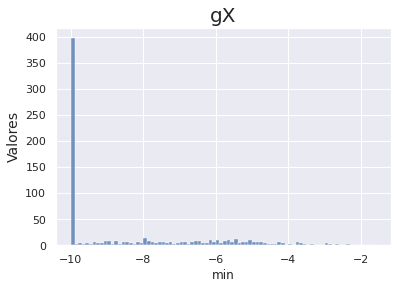

In [36]:
ax = sns.histplot(
    dados.loc[:, 'g0':'g771'].describe().T['min'],
    binwidth=.1)
ax.set_title('gX', fontsize=20)
ax.set_ylabel('Valores', fontsize=14)


Text(0, 0.5, 'Valores')

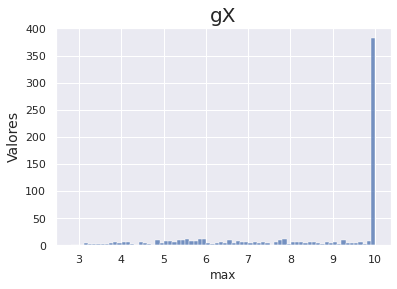

In [37]:
ax = sns.histplot(
    dados.loc[:, 'g0':'g771'].describe().T['max'],
    binwidth=.1)
ax.set_title('gX', fontsize=20)
ax.set_ylabel('Valores', fontsize=14)

#dados2.loc[:, 'g0':'g771'].describe().T['max'].hist(bins=30)

Text(0, 0.5, 'Valores')

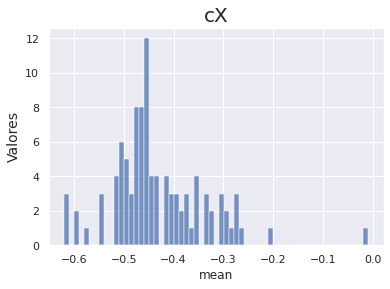

In [38]:
ax = sns.histplot(
    dados.loc[:, 'c0':'c99'].describe().T['mean'],
    binwidth=.01)
ax.set_title('cX', fontsize=20)
ax.set_ylabel('Valores', fontsize=14)


#dados2.loc[:, 'c0':'c99'].describe().T['mean'].hist(bins=50)

Text(0, 0.5, 'Valores')

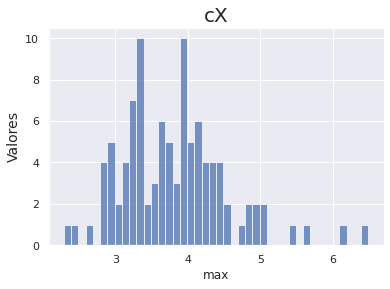

In [39]:
ax = sns.histplot(
    dados.loc[:, 'c0':'c99'].describe().T['max'],
    binwidth=.1)
ax.set_title('cX', fontsize=20)
ax.set_ylabel('Valores', fontsize=14)
#dados2.loc[:, 'c0':'c99'].describe().T['max'].hist(bins=50)

Text(0.5, 1.0, 'g0')

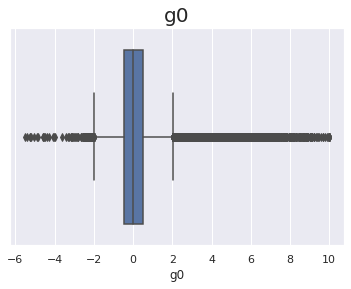

In [40]:
ax = sns.boxplot(x='g0' , data=dados)
ax.set_title('g0', fontsize=20)

Text(0.5, 1.0, 'g0 por tratamento')

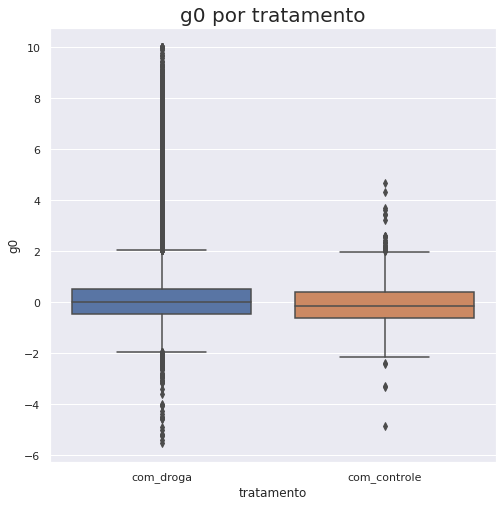

In [41]:
plt.figure(figsize=(8,8))
ax = sns.boxplot(y='g0', x='tratamento' , data=dados)
ax.set_title('g0 por tratamento', fontsize=20)

In [42]:
dados.head()

id tratamento  tempo dose  ...     c96     c97     c98     c99
0  id_000644bb2  com_droga     24   D1  ... -0.3981  0.2139  0.3801  0.4176
1  id_000779bfc  com_droga     72   D1  ...  0.1522  0.1241  0.6077  0.7371
2  id_000a6266a  com_droga     48   D1  ... -0.6417 -0.2187 -1.4080  0.6931
3  id_0015fd391  com_droga     48   D1  ... -1.6210 -0.8784 -0.3876 -0.8154
4  id_001626bd3  com_droga     72   D2  ...  0.1094  0.2885 -0.3786  0.7125

[5 rows x 877 columns]

In [43]:
pd.crosstab(dados['dose'], dados['tempo'])

tempo    24    48    72
dose                   
D1     3886  4354  3907
D2     3886  3896  3885

In [44]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'])

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

In [45]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], normalize='index')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

In [46]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values=dados['g0'], aggfunc='mean')

tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.251760   0.367996
     48        -0.122773   0.412469
     72        -0.295271   0.286250
D2   24         0.010754   0.115253
     48         0.013174   0.214480
     72         0.070250   0.253439

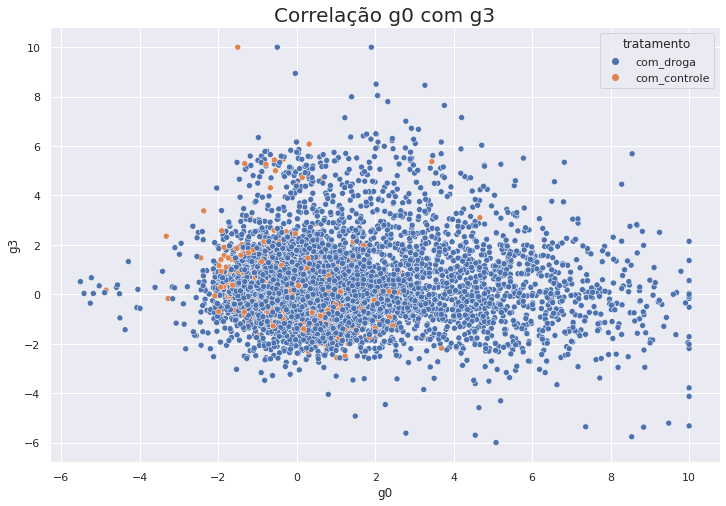

In [47]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x='g0', y='g3', data=dados, hue='tratamento')
ax.set_title('Correlação g0 com g3', fontsize=20)
plt.show()

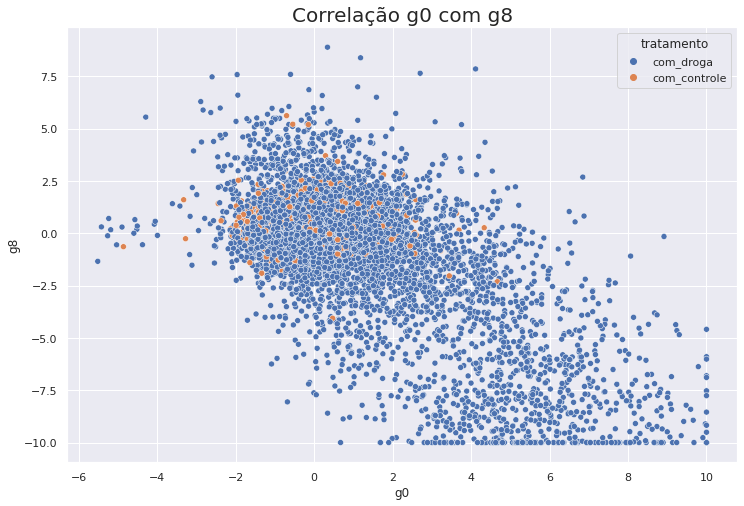

In [48]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x='g0', y='g8', data=dados, hue='tratamento')
ax.set_title('Correlação g0 com g8', fontsize=20)
plt.show()

<Figure size 864x576 with 0 Axes>

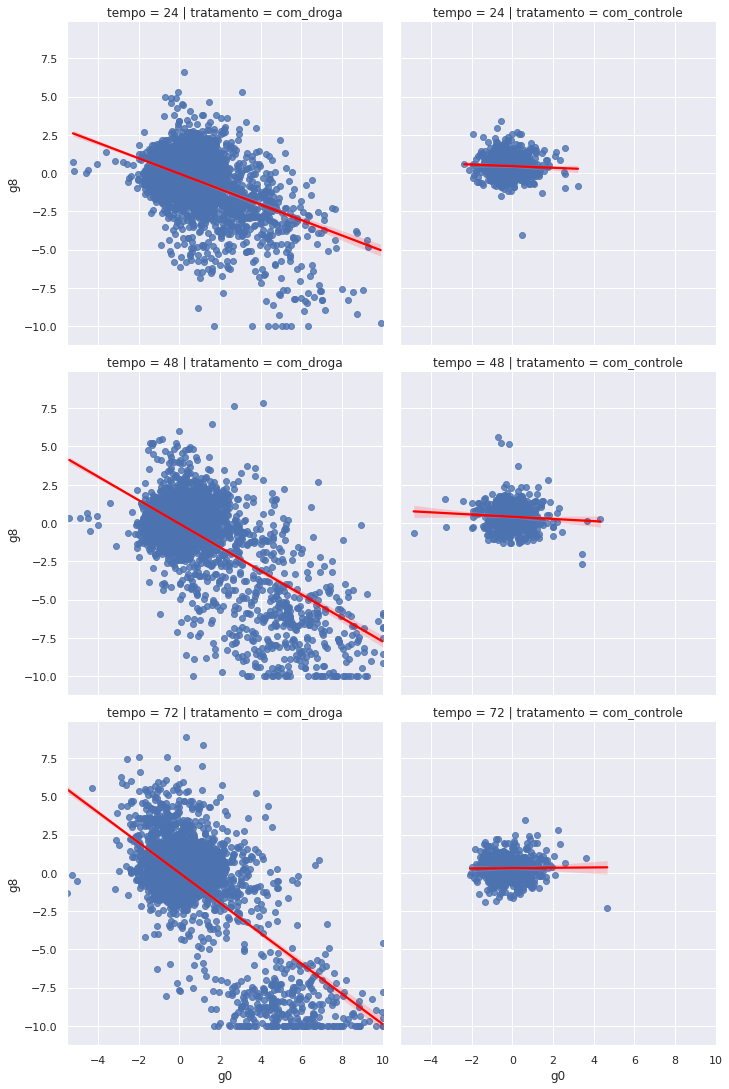

In [49]:
plt.figure(figsize=(12,8))
ax = sns.lmplot(data=dados, x='g0', y='g8',  line_kws={'color':'red'}, col='tratamento', row='tempo')
plt.show()

In [50]:
dados.loc[:,'g0':'g771'].corr()

g0        g1        g2  ...      g769      g770      g771
g0    1.000000  0.086032  0.176188  ... -0.127375 -0.514201  0.405908
g1    0.086032  1.000000 -0.054518  ... -0.006866 -0.095108 -0.032233
g2    0.176188 -0.054518  1.000000  ...  0.014489 -0.078661  0.103985
g3    0.011266 -0.027855  0.042633  ... -0.206077 -0.002142  0.058219
g4    0.403153  0.193647  0.013968  ... -0.172727 -0.363673  0.250713
...        ...       ...       ...  ...       ...       ...       ...
g767 -0.052622 -0.003378 -0.053149  ...  0.065450  0.008603 -0.001136
g768  0.300241 -0.030756  0.115415  ...  0.079364 -0.382607  0.351651
g769 -0.127375 -0.006866  0.014489  ...  1.000000  0.135853 -0.083713
g770 -0.514201 -0.095108 -0.078661  ...  0.135853  1.000000 -0.425063
g771  0.405908 -0.032233  0.103985  ... -0.083713 -0.425063  1.000000

[772 rows x 772 columns]

In [51]:
corr = dados.loc[:,'g0':'g50'].corr()

Text(0.5, 1.0, "Correlações entre G's")

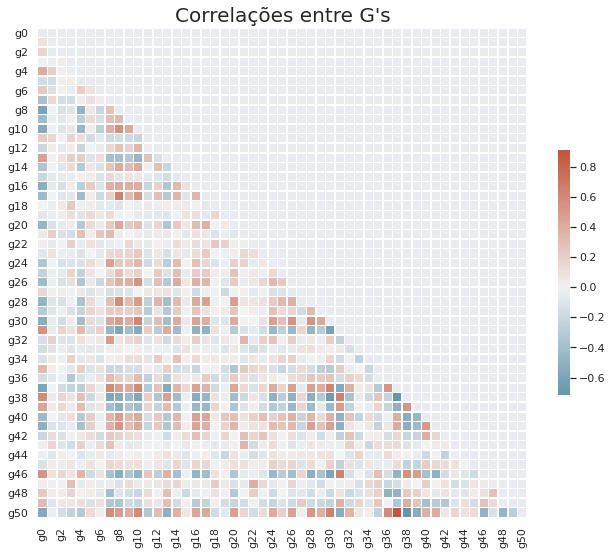

In [52]:
import numpy as np

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title("Correlações entre G's", fontsize=20)

In [53]:
corr_celular = dados.loc[:,'c0':'c50'].corr()

Text(0.5, 1.0, "Correlação entre C's")

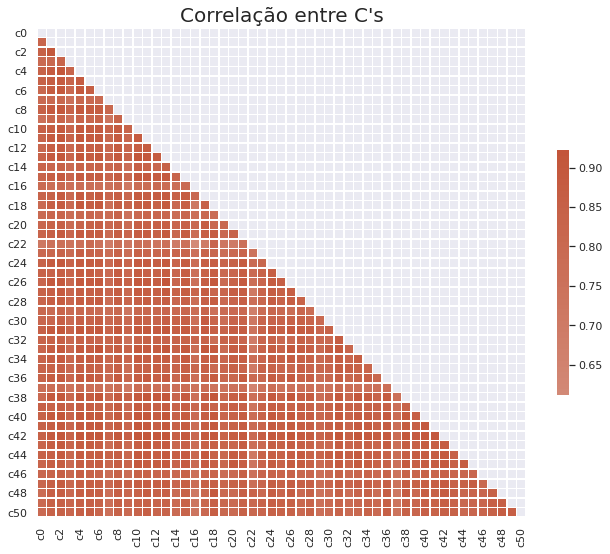

In [54]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_celular, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(corr_celular, mask=mask, cmap=cmap, center=0, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title("Correlação entre C's", fontsize=20)

#Criar tabelas com Groupby

In [55]:
top5 = dados.loc[dados['composto'].isin(cod_compostos.index)]

In [56]:
a = top5.groupby(['composto','tratamento'])

In [57]:
a.mean().T

composto    5628cb3ee  87d714366  8b87a7a83  9f80f3f77    cacb2b860
tratamento  com_droga  com_droga  com_droga  com_droga com_controle
tempo       48.831683  48.033426  48.354680  48.195122    48.077170
g0           2.089169   5.044589   0.560480   0.190695    -0.096364
g1          -0.367460   0.260397  -0.281461  -0.353853    -0.281979
g2           0.255831   1.140843   0.174264  -0.074071    -0.037559
g3          -0.068789   0.935945   2.308259   0.172826     0.090283
...               ...        ...        ...        ...          ...
c95         -0.110763  -6.409197   0.601000  -0.112305     0.195568
c96         -1.145996  -9.258928   0.160265   0.238849     0.155791
c97          0.281791  -7.471013  -0.282772   0.056950     0.161715
c98         -0.712742  -7.373287  -0.909824   0.164495     0.286888
c99          0.099556  -5.284369  -0.120886  -0.016809     0.263716

[873 rows x 5 columns]

In [58]:
dados

id    tratamento  tempo dose  ...     c96     c97     c98     c99
0      id_000644bb2     com_droga     24   D1  ... -0.3981  0.2139  0.3801  0.4176
1      id_000779bfc     com_droga     72   D1  ...  0.1522  0.1241  0.6077  0.7371
2      id_000a6266a     com_droga     48   D1  ... -0.6417 -0.2187 -1.4080  0.6931
3      id_0015fd391     com_droga     48   D1  ... -1.6210 -0.8784 -0.3876 -0.8154
4      id_001626bd3     com_droga     72   D2  ...  0.1094  0.2885 -0.3786  0.7125
...             ...           ...    ...  ...  ...     ...     ...     ...     ...
23809  id_fffb1ceed     com_droga     24   D2  ...  0.0631  0.9171  0.5258  0.4680
23810  id_fffb70c0c     com_droga     24   D2  ... -0.2084 -0.1224 -0.2715  0.3689
23811  id_fffc1c3f4  com_controle     48   D2  ...  0.2256  0.7592  0.6656  0.3808
23812  id_fffcb9e7c     com_droga     24   D1  ...  0.1732  0.7015 -0.6290  0.0740
23813  id_ffffdd77b     com_droga     72   D1  ... -3.5770 -0.4775 -2.1500 -4.2520

[23814 rows x 877 columns]

#Normalizar por coluna no Crosstab

In [59]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], normalize='columns')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.161308   0.163341
     48         0.183816   0.182750
     72         0.164523   0.164024
D2   24         0.163451   0.163158
     48         0.163451   0.163614
     72         0.163451   0.163113

#Explorar outros agregadores

In [60]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values=dados['g0'], aggfunc="std")

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.751395   1.461954
     48         0.853396   1.693903
     72         0.769294   1.458600
D2   24         0.836626   1.044999
     48         0.836845   1.315476
     72         0.878041   1.451532

#Explorar a função melt.

In [61]:
dados.melt(id_vars=['dose','tratamento','composto'], value_vars=['g1','c1'])

dose    tratamento   composto variable   value
0       D1     com_droga  b68db1d53       g1  0.5577
1       D1     com_droga  df89a8e5a       g1  0.4087
2       D1     com_droga  18bb41b2c       g1  0.5817
3       D1     com_droga  8c7f86626       g1 -0.2491
4       D2     com_droga  7cbed3131       g1 -0.4009
...    ...           ...        ...      ...     ...
47623   D2     com_droga  df1d0a5a1       c1  0.1871
47624   D2     com_droga  ecf3b6b74       c1  0.4350
47625   D2  com_controle  cacb2b860       c1  0.6329
47626   D1     com_droga  8b87a7a83       c1  1.3240
47627   D1     com_droga  972f41291       c1 -2.0350

[47628 rows x 5 columns]

#Calcular e analisar a correlação entre os g’s e os c’s.

In [62]:
compara = dados.loc[:,'g0':'c50'].corr()

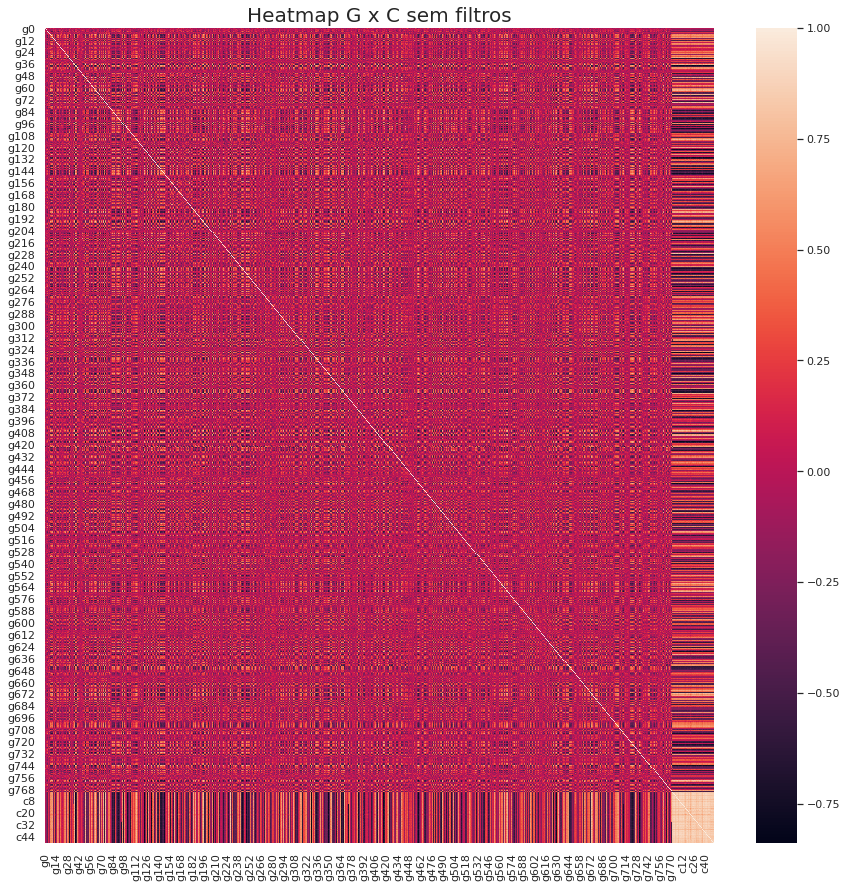

In [63]:
plt.figure(figsize=(15, 15))
ax = sns.heatmap(compara)
ax.set_title("Heatmap G x C sem filtros", fontsize=20)
plt.show()

In [64]:
compara = compara.loc['g0':'g771','c1':'c50'].sort_values(by='c1')

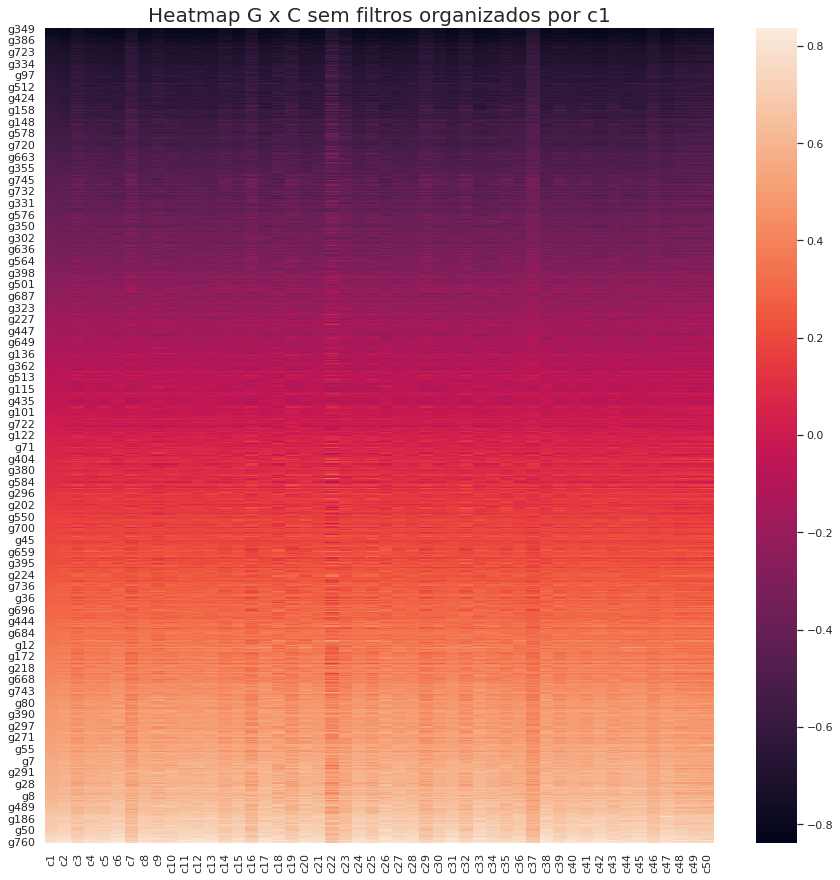

In [65]:
plt.figure(figsize=(15, 15))
ax = sns.heatmap(compara)
ax.set_title("Heatmap G x C sem filtros organizados por c1", fontsize=20)
plt.show()


As correlações entre G e C aprentam uma certa constância, apesar de alguns estarem reagindo, possivelmente por algum fator.
Uma hipótese é que outra variável poderá estar influenciando.
Em seguida podemos fixar algumas variáveis para comparar com esta análise.

In [66]:
compara = dados[dados['tempo']==24].loc[:,'g0':'c50'].corr()

In [67]:
compara = compara.loc['g0':'g771','c1':'c50'].sort_values(by='c1')

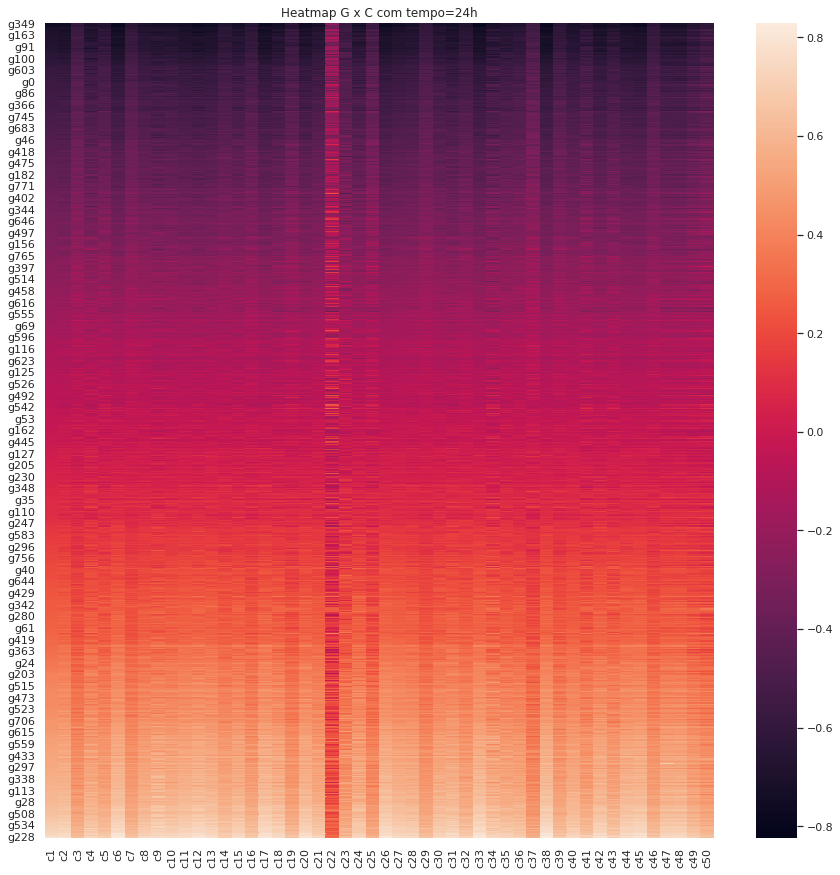

In [68]:
plt.figure(figsize=(15, 15))
ax = sns.heatmap(compara)
ax.set_title('Heatmap G x C com tempo=24h')
plt.show()

In [69]:
compara = dados[dados['tempo']==48].loc[:,'g0':'c50'].corr()

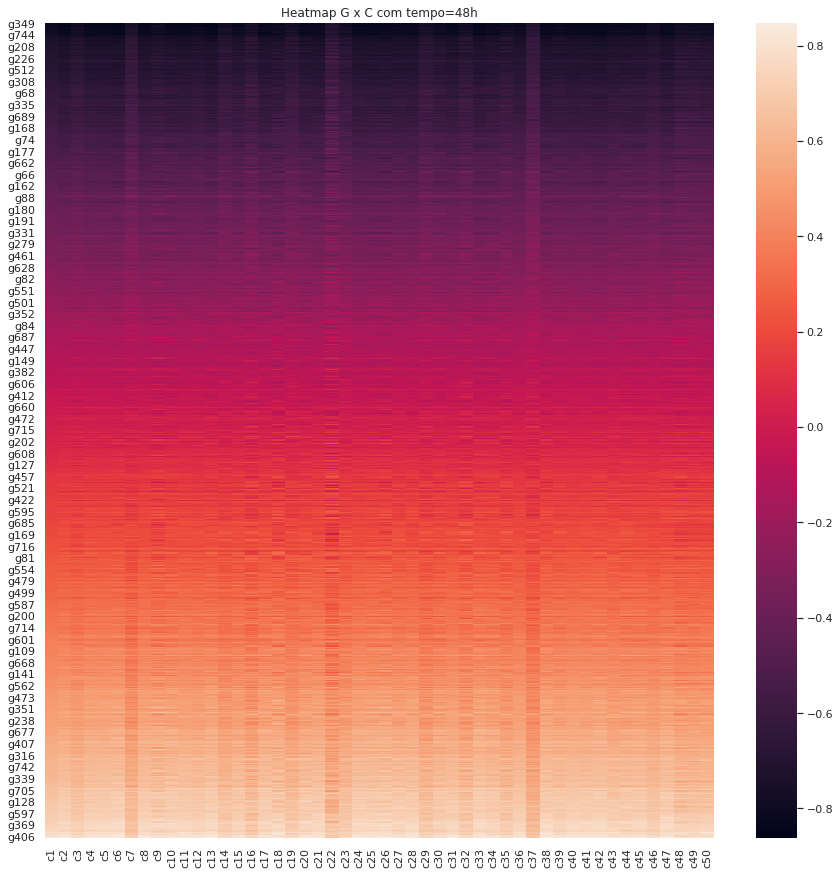

In [70]:
compara = compara.loc['g0':'g771','c1':'c50'].sort_values(by='c1')
plt.figure(figsize=(15, 15))
ax=sns.heatmap(compara)
ax.set_title('Heatmap G x C com tempo=48h')
plt.show()

In [71]:
compara = dados[dados['tempo']==72].loc[:,'g0':'c50'].corr()

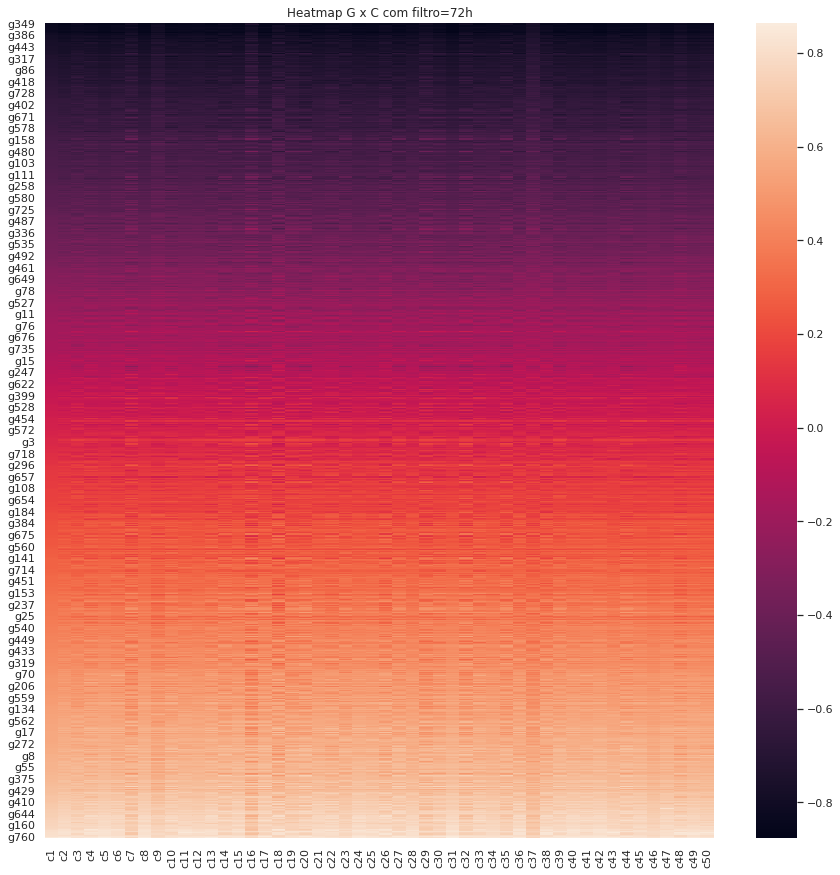

In [72]:
compara = compara.loc['g0':'g771','c1':'c50'].sort_values(by='c1')
plt.figure(figsize=(15, 15))
ax= sns.heatmap(compara)
ax.set_title("Heatmap G x C com filtro=72h")
plt.show()

In [73]:
compara = dados[dados['tempo']==24 ].loc[:,'g0':'c50'].corr()

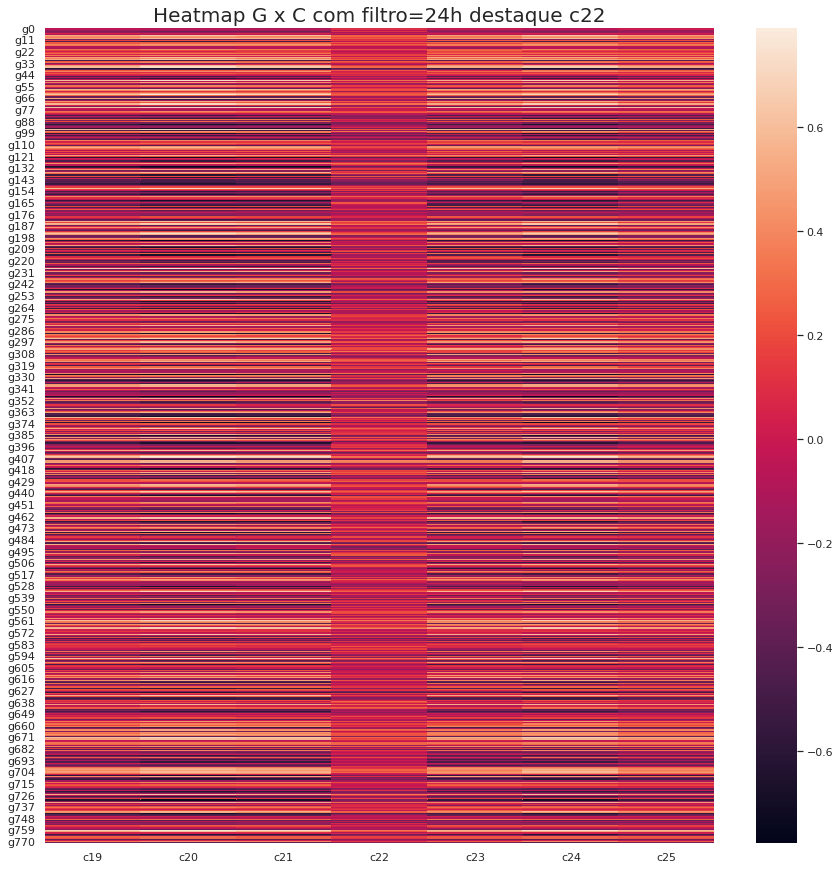

In [74]:
plt.figure(figsize=(15, 15))
ax = sns.heatmap(compara.loc['g0':'g771','c19':'c25'])
ax.set_title("Heatmap G x C com filtro=24h destaque c22", fontsize=20)
plt.show()

#Análise Cultura 22
Há algum comportamento diferente na cultura 22, ela tem um comportamento bem diferente das outras.

# Desafios Aula 01
### Desafio 01 - investigar o porque a classe tratamento é tão desbalanceada.<br>
### Desafio 02 - plotar as 5 últimas linhas da tabela.<br>
### Desafio 03 - Proporção das classes tratamento.<br>
### Desafio 04 - Quantas tipos de drogas foram investigados.<br>
### Desafio 05 - Procurar na documentação o método query do Pandas. <br>
### Desafio 06 - Renomear as colunas tirando o "-".<br>
### Desafio 07 - Colocar titulo no gráfico (label) mais bonito (matplotlib.pyplot)<br>
### Desafio 08 - Resumo do que você descobriu e aprendeu com os dados<br>


# Aula 02
### Desafio 01: Ordenar o gráfico countplot
### Desafio 02: Melhorar a visuavisualização alterando tamanho da fonte
### Desafio 03: Plotar os histogramas com seaborn
### Desafio 04: Estudar sobre as estatísticas retornadas no .describe()
### Desafio 05: Refletir sobre a manipulmanipulação do tamanho das visualizações
### Desafio 06: Fazer outras análises com o boxplot e até com o histograma.
### Desafio 07: Resumir o que aprendeu na aula 2.

# Aula 03

Relacionar os dados entre colunas
pd.crosstab
###Desafio 01: Criar tabelas de frequência com o pandas.groupby().
###Desafio 02: Normalizar o crosstab pela coluna.
Por que existe diferenças de dose nos experimentos com controle?
###Desafio 03: Explorar outros agregadores
###Desafio 04: Explorar a função melt.
###Desafio 05: Calcular e analisar a correlação entre os g’s e os c’s.
Como as quantidades são diferentes, como fazer esta relação
Refletir sobre os efeitos biológicos, genes que afetam todos os tipos de células.
###Desafio 06: Estudar o código que plota a matriz de correlação (heatmap).
###Desafio 07: Resumo do que aprendeu com os dados.
Correlações:
-1 +1 correlação forte
Próximo de 0 não existe ou é fraca.
Correlação não é = a causalidade, pode ser uma pista ou caminho de mais análises.
Spurious correlation
C = viabilidade celular, quantas células sobreviveram
Phacking ()
A relação entre as culturas 


#Aula 4
## Desafios
### 01: Encontrar o top 10, das ações do MOA (Sufixo: inibidor, agonista, antagonista)
### 02: Criar a coluna eh_controle para quando na linha tratamento == 'com_controle'.
### 03: Criar três colunas para indicar tempo, transformar a coluna categórica de tempo com 3 valores (24,48,72 horas) em 3 colunas com 0 e 1.
### 04: Estudar sobre combinações de DF https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
### 05: Análise mais detalhada considerando tempo e dose, para comparar as distribuições. (escolher uma droga e comparar com controle).
### 06: Descobrir se tem algum composto que dependendo da configuração do experimento, ativa ou não ativa algum MOA 
### 07: Descobrir se tem algum composto que dependendo da configuração do experimento, ativa MOAs diferentes.
### 08: Resumo do que você aprendeu com os dados.


In [75]:
dados_resultados = pd.read_csv('https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_resultados.csv?raw=true')
dados_resultados.head()
dados_resultados.describe()

5-alpha_reductase_inhibitor  ...  wnt_inhibitor
count                 23814.000000  ...   23814.000000
mean                      0.000714  ...       0.001260
std                       0.026709  ...       0.035472
min                       0.000000  ...       0.000000
25%                       0.000000  ...       0.000000
50%                       0.000000  ...       0.000000
75%                       0.000000  ...       0.000000
max                       1.000000  ...       1.000000

[8 rows x 206 columns]

In [76]:
dados_resultados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 207 entries, id to wnt_inhibitor
dtypes: int64(206), object(1)
memory usage: 37.6+ MB


In [77]:
dados_resultados['acat_inhibitor'].unique()

array([0, 1])

In [78]:
dados_resultados['acetylcholine_receptor_agonist'].unique()

array([0, 1])

Moa = Mechanismo of Action - Mecanismo de ativação dos dados
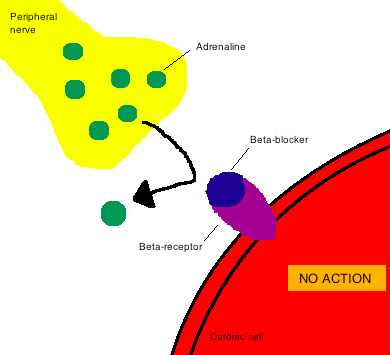

Como são os nomes das colunas: 
  f"{Sufixo (alvo)}_{ação}"
  

In [79]:
contagem_moa = dados_resultados.drop('id', axis=1).sum().sort_values(ascending=False)
# contagem_moa = dados_resultados.select_dtypes('int64').sum().sort_values(ascending=False)
contagem_moa

nfkb_inhibitor                                832
proteasome_inhibitor                          726
cyclooxygenase_inhibitor                      435
dopamine_receptor_antagonist                  424
serotonin_receptor_antagonist                 404
                                             ... 
protein_phosphatase_inhibitor                   6
autotaxin_inhibitor                             6
diuretic                                        6
erbb2_inhibitor                                 1
atp-sensitive_potassium_channel_antagonist      1
Length: 206, dtype: int64

In [80]:
#soma pelas linhas
dados_resultados.drop('id', axis=1).sum(axis=1)

0        1
1        0
2        3
3        0
4        1
        ..
23809    1
23810    1
23811    0
23812    1
23813    0
Length: 23814, dtype: int64

In [81]:
# dados_resultados.drop(columns=['nmoa','n_moa'])

In [82]:
dados_resultados['n_moa'] = dados_resultados.drop('id', axis=1).sum(axis=1)

In [83]:

dados_resultados['ativo_moa'] = (dados_resultados['n_moa'] != 0)
dados_resultados

id  5-alpha_reductase_inhibitor  ...  n_moa  ativo_moa
0      id_000644bb2                            0  ...      1       True
1      id_000779bfc                            0  ...      0      False
2      id_000a6266a                            0  ...      3       True
3      id_0015fd391                            0  ...      0      False
4      id_001626bd3                            0  ...      1       True
...             ...                          ...  ...    ...        ...
23809  id_fffb1ceed                            0  ...      1       True
23810  id_fffb70c0c                            0  ...      1       True
23811  id_fffc1c3f4                            0  ...      0      False
23812  id_fffcb9e7c                            0  ...      1       True
23813  id_ffffdd77b                            0  ...      0      False

[23814 rows x 209 columns]

In [84]:
dados_combinados = pd.merge(dados, dados_resultados[['id','n_moa', 'ativo_moa']],on='id' )
dados_combinados.head()

id tratamento  tempo dose  ...     c98     c99  n_moa  ativo_moa
0  id_000644bb2  com_droga     24   D1  ...  0.3801  0.4176      1       True
1  id_000779bfc  com_droga     72   D1  ...  0.6077  0.7371      0      False
2  id_000a6266a  com_droga     48   D1  ... -1.4080  0.6931      3       True
3  id_0015fd391  com_droga     48   D1  ... -0.3876 -0.8154      0      False
4  id_001626bd3  com_droga     72   D2  ... -0.3786  0.7125      1       True

[5 rows x 879 columns]

In [85]:
dados_combinados.query('tratamento == "com_controle"')['ativo_moa'].value_counts()

False    1866
Name: ativo_moa, dtype: int64

In [86]:
dados_combinados.query('tratamento == "com_droga"')['ativo_moa'].value_counts()

True     14447
False     7501
Name: ativo_moa, dtype: int64

Text(0.5, 1.0, 'Principais Compostos')

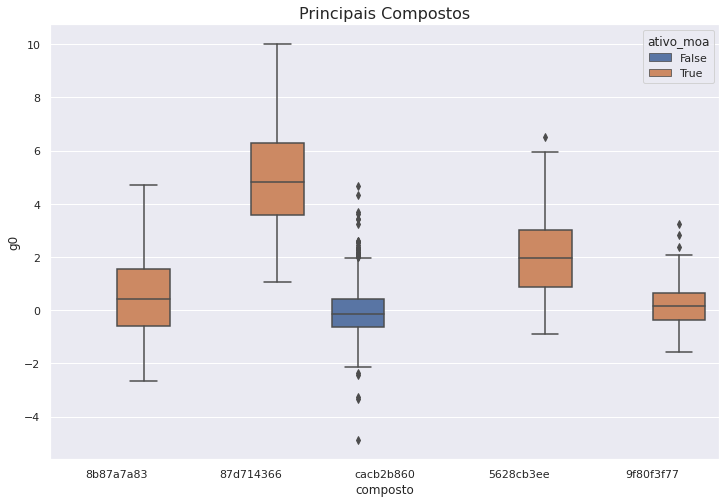

In [87]:
composto_principal = dados_combinados['composto'].value_counts().index[:5]
plt.figure(figsize=(12,8))
ax= sns.boxplot(data=dados_combinados.query('composto in @composto_principal'),y='g0', x='composto', hue='ativo_moa')
ax.set_title("Principais Compostos", fontsize=16)

#01: Encontrar o top 10, das ações do MOA (Sufixo: inibidor, agonista, antagonista)

In [88]:
sufixos = pd.DataFrame(contagem_moa)

In [89]:
# sufixos['sufixo'] = sufixos.apply(lambda row: str(row.index).split('_'))
sufixos['sufixo'] = sufixos.apply(lambda row: row.index.str.split('_'))

In [90]:
sufixos

0                                           sufixo
nfkb_inhibitor                              832                                [nfkb, inhibitor]
proteasome_inhibitor                        726                          [proteasome, inhibitor]
cyclooxygenase_inhibitor                    435                      [cyclooxygenase, inhibitor]
dopamine_receptor_antagonist                424                 [dopamine, receptor, antagonist]
serotonin_receptor_antagonist               404                [serotonin, receptor, antagonist]
...                                         ...                                              ...
protein_phosphatase_inhibitor                 6                [protein, phosphatase, inhibitor]
autotaxin_inhibitor                           6                           [autotaxin, inhibitor]
diuretic                                      6                                       [diuretic]
erbb2_inhibitor                               1                               [erbb2, inhibitor]
atp-sensitive_potassium_channel_antagonist    1  [atp-sensitive, potassium, channel, antagonist]

[206 rows x 2 columns]

In [91]:
sufixos['sufixo'] = sufixos['sufixo'].apply(lambda x: x[-1])

In [92]:
sufixos

0      sufixo
nfkb_inhibitor                              832   inhibitor
proteasome_inhibitor                        726   inhibitor
cyclooxygenase_inhibitor                    435   inhibitor
dopamine_receptor_antagonist                424  antagonist
serotonin_receptor_antagonist               404  antagonist
...                                         ...         ...
protein_phosphatase_inhibitor                 6   inhibitor
autotaxin_inhibitor                           6   inhibitor
diuretic                                      6    diuretic
erbb2_inhibitor                               1   inhibitor
atp-sensitive_potassium_channel_antagonist    1  antagonist

[206 rows x 2 columns]

In [93]:
MOA_top10 = sufixos.groupby(by=['sufixo'])
MOA_top10.sum().sort_values(by=0, ascending=False).head(10)

0
sufixo                 
inhibitor          9693
antagonist         3449
agonist            2330
blocker             323
agent               150
activator           115
local                80
antioxidant          73
anti-inflammatory    73
immunosuppressant    73

#02: Criar a coluna eh_controle para quando na linha tratamento == 'com_controle'.

In [94]:
dados_combinados['eh_controle'] = (dados_combinados['tratamento'] == 'com_controle')

In [95]:
dados_combinados

id    tratamento  tempo  ... n_moa ativo_moa  eh_controle
0      id_000644bb2     com_droga     24  ...     1      True        False
1      id_000779bfc     com_droga     72  ...     0     False        False
2      id_000a6266a     com_droga     48  ...     3      True        False
3      id_0015fd391     com_droga     48  ...     0     False        False
4      id_001626bd3     com_droga     72  ...     1      True        False
...             ...           ...    ...  ...   ...       ...          ...
23809  id_fffb1ceed     com_droga     24  ...     1      True        False
23810  id_fffb70c0c     com_droga     24  ...     1      True        False
23811  id_fffc1c3f4  com_controle     48  ...     0     False         True
23812  id_fffcb9e7c     com_droga     24  ...     1      True        False
23813  id_ffffdd77b     com_droga     72  ...     0     False        False

[23814 rows x 880 columns]

#03: Criar três colunas para indicar tempo, transformar a coluna categórica de tempo com 3 valores (24,48,72 horas) em 3 colunas com 0 e 1.

In [96]:
from sklearn.feature_extraction import DictVectorizer
dvec = DictVectorizer(sparse=False)

In [97]:
pd.get_dummies(dados_combinados, columns=['tempo'])

id    tratamento dose  ... tempo_24  tempo_48  tempo_72
0      id_000644bb2     com_droga   D1  ...        1         0         0
1      id_000779bfc     com_droga   D1  ...        0         0         1
2      id_000a6266a     com_droga   D1  ...        0         1         0
3      id_0015fd391     com_droga   D1  ...        0         1         0
4      id_001626bd3     com_droga   D2  ...        0         0         1
...             ...           ...  ...  ...      ...       ...       ...
23809  id_fffb1ceed     com_droga   D2  ...        1         0         0
23810  id_fffb70c0c     com_droga   D2  ...        1         0         0
23811  id_fffc1c3f4  com_controle   D2  ...        0         1         0
23812  id_fffcb9e7c     com_droga   D1  ...        1         0         0
23813  id_ffffdd77b     com_droga   D1  ...        0         0         1

[23814 rows x 882 columns]

In [98]:
#dados_combinados

#04: Estudar sobre combinações de DF https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html


#05: Análise mais detalhada considerando tempo e dose, para comparar as distribuições. (escolher uma droga e comparar com controle).

In [106]:
droga = dados_combinados[dados_combinados['composto'].isin(['cacb2b860', '87d714366'])]

id    tratamento  tempo  ... n_moa ativo_moa  eh_controle
16     id_002fb9c19     com_droga     48  ...     2      True        False
25     id_0054388ec  com_controle     48  ...     0     False         True
38     id_0079af0fb  com_controle     24  ...     0     False         True
40     id_007bfbb91  com_controle     24  ...     0     False         True
47     id_008a986b7  com_controle     48  ...     0     False         True
...             ...           ...    ...  ...   ...       ...          ...
23776  id_ff9d0a022     com_droga     24  ...     2      True        False
23791  id_ffd1fd119     com_droga     72  ...     2      True        False
23793  id_ffd26f361  com_controle     48  ...     0     False         True
23802  id_fff3976bd     com_droga     24  ...     2      True        False
23811  id_fffc1c3f4  com_controle     48  ...     0     False         True

[2584 rows x 880 columns]

<Figure size 864x1440 with 0 Axes>

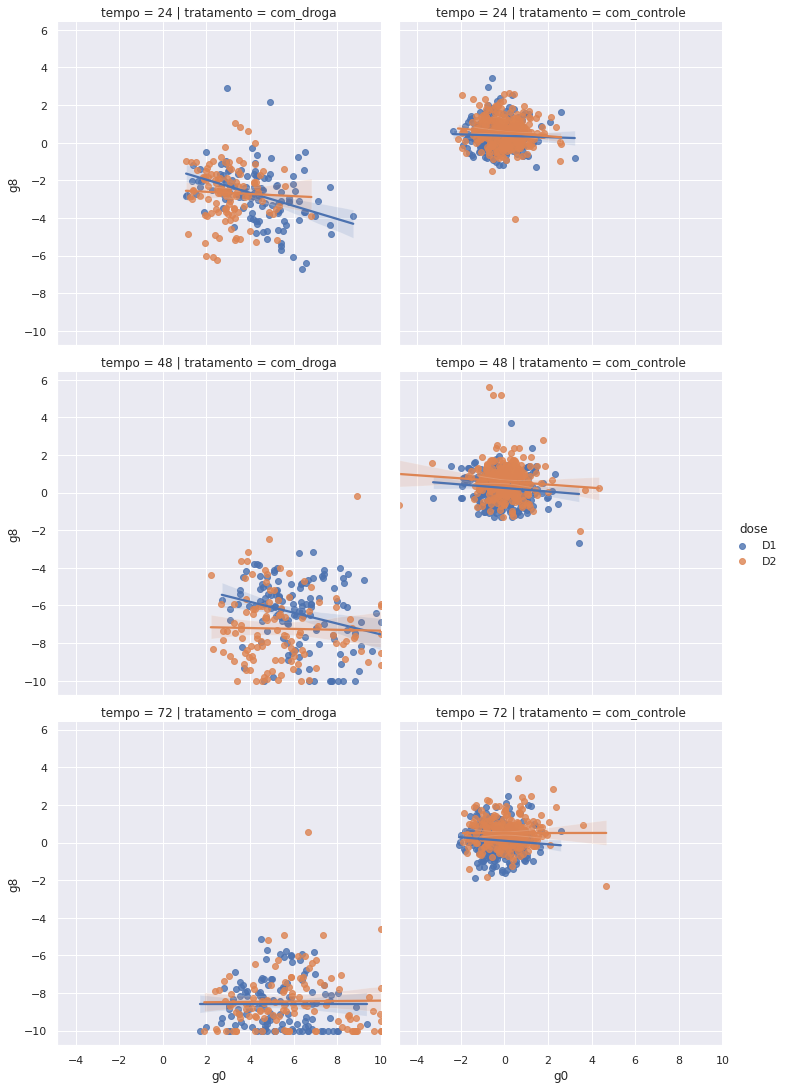

In [109]:
plt.figure(figsize=(12,20))
# ax = sns.lmplot(data=droga, x='g0', y='g8',  line_kws={'color':'red'}, col= 'tratamento', row='tempo', hue='dose')
ax = sns.lmplot(data=droga, x='g0', y='g8',   col= 'tratamento', row='tempo', hue='dose')
plt.show()

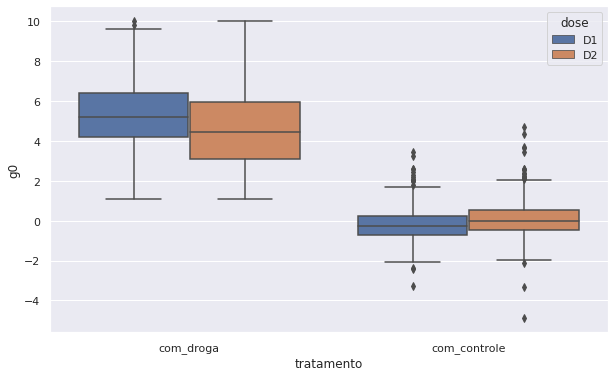

In [113]:
plt.figure(figsize=(10,6))
# ax = sns.lmplot(data=droga, x='g0', y='g8',  line_kws={'color':'red'}, col= 'tratamento', row='tempo', hue='dose')
# ax = sns.boxplot(data=droga, x='g0', y='g8',   col= 'tratamento', row='tempo', hue='dose')
ax= sns.boxplot(data=droga,y='g0', x='tratamento', hue='dose')
plt.show()

##Pelo demonstrado nos gráficos a drog escolhida amplia a sua ação conforme o tempo muda. E a dose aparentemente não mostra uma mudança clara.

#06: Descobrir se tem algum composto que dependendo da configuração do experimento, ativa ou não ativa algum MOA


In [121]:
dados_combinados['n_moa'].describe()

count    23814.000000
mean         0.707315
std          0.679532
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          7.000000
Name: n_moa, dtype: float64

In [132]:
#como o n_moa tem 25% de experimentos que não ativaram, separamos estes compostos para ver se algum outra ocasião o MOA foi diferente.
drogas_nao_ativas = dados_combinados.query('n_moa == 0 and not eh_controle')['composto'].unique()

In [133]:
len(drogas_nao_ativas)

1212

In [134]:
dados_combinados.query('composto in @drogas_nao_ativas and n_moa>0')

Empty DataFrame
Columns: [id, tratamento, tempo, dose, composto, g0, g1, g2, g3, g4, g5, g6, g7, g8, g9, g10, g11, g12, g13, g14, g15, g16, g17, g18, g19, g20, g21, g22, g23, g24, g25, g26, g27, g28, g29, g30, g31, g32, g33, g34, g35, g36, g37, g38, g39, g40, g41, g42, g43, g44, g45, g46, g47, g48, g49, g50, g51, g52, g53, g54, g55, g56, g57, g58, g59, g60, g61, g62, g63, g64, g65, g66, g67, g68, g69, g70, g71, g72, g73, g74, g75, g76, g77, g78, g79, g80, g81, g82, g83, g84, g85, g86, g87, g88, g89, g90, g91, g92, g93, g94, ...]
Index: []

[0 rows x 880 columns]

##Aparetemente não houve caso de a droga não ativar e depois ativar se aumentou dose ou tempo.

#07: Descobrir se tem algum composto que dependendo da configuração do experimento, ativa MOAs diferentes.


In [157]:
#como o n_moa tem 25% de experimentos que não ativaram, separamos estes compostos para ver se algum outra ocasião o MOA foi diferente.
drogas_ativa_1 = dados_combinados.query('n_moa == 7 and not eh_controle')['composto'].unique()

In [158]:
len(drogas_ativa_1)

1

In [160]:
dados_combinados.query('composto in @drogas_ativa_1 and n_moa>7')

Empty DataFrame
Columns: [id, tratamento, tempo, dose, composto, g0, g1, g2, g3, g4, g5, g6, g7, g8, g9, g10, g11, g12, g13, g14, g15, g16, g17, g18, g19, g20, g21, g22, g23, g24, g25, g26, g27, g28, g29, g30, g31, g32, g33, g34, g35, g36, g37, g38, g39, g40, g41, g42, g43, g44, g45, g46, g47, g48, g49, g50, g51, g52, g53, g54, g55, g56, g57, g58, g59, g60, g61, g62, g63, g64, g65, g66, g67, g68, g69, g70, g71, g72, g73, g74, g75, g76, g77, g78, g79, g80, g81, g82, g83, g84, g85, g86, g87, g88, g89, g90, g91, g92, g93, g94, ...]
Index: []

[0 rows x 880 columns]

#Apos avaliar a diferentes possiveis quantidades de MOA (7), não houve variação conforme tempo e dose, no numeros ativados

#08: Resumo do que você aprendeu com os dados.

Aprendi que as drogas possuem um comportamento bem pareceido conforme a dose e tempo. 
Existem funções para transformar variáveis de categorias em colunas binárias.
